In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [11]:
# Set style for plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

In [12]:
# Function to load and preprocess data
def load_and_preprocess_data(file_path):
    print("Loading and preprocessing data...")
    # Load the data
    df = pd.read_csv(file_path)
    
    # Convert date to datetime
    df['date'] = pd.to_datetime(df['date'])
    
    # Extract date features
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['day_of_week'] = df['date'].dt.dayofweek
    
    # Create a time-based feature for trend analysis
    df['time_index'] = range(len(df))
    
    return df

In [13]:
# Function for exploratory data analysis
def exploratory_data_analysis(df):
    print("\nPerforming exploratory data analysis...")
    
    # Display basic information
    print("\nDataset Shape:", df.shape)
    print("\nDataset Information:")
    print(df.info())
    print("\nSummary Statistics:")
    print(df.describe())
    
    # Check for missing values
    print("\nMissing Values:")
    print(df.isnull().sum())
    
    # Create visualizations
    print("\nGenerating visualizations...")
    
    # Set up the figure for plots
    plt.figure(figsize=(15, 10))
    
    # Plot 1: Time series of sales
    plt.subplot(2, 2, 1)
    df.groupby('date')['sales_amount'].sum().plot()
    plt.title('Daily Sales Over Time')
    plt.xlabel('Date')
    plt.ylabel('Sales Amount')
    
    # Plot 2: Sales by category
    plt.subplot(2, 2, 2)
    sns.barplot(x='category', y='sales_amount', data=df)
    plt.title('Sales by Product Category')
    plt.xlabel('Category')
    plt.ylabel('Average Sales Amount')
    plt.xticks(rotation=45)
    
    # Plot 3: Sales by region
    plt.subplot(2, 2, 3)
    sns.barplot(x='region', y='sales_amount', data=df)
    plt.title('Sales by Region')
    plt.xlabel('Region')
    plt.ylabel('Average Sales Amount')
    
    # Plot 4: Effect of promotion on sales
    plt.subplot(2, 2, 4)
    sns.boxplot(x='promotion', y='sales_amount', data=df)
    plt.title('Effect of Promotion on Sales')
    plt.xlabel('Promotion (0=No, 1=Yes)')
    plt.ylabel('Sales Amount')
    
    plt.tight_layout()
    plt.savefig('sales_analysis.png')
    
    # Additional plots
    plt.figure(figsize=(15, 10))
    
    # Plot 5: Sales distribution
    plt.subplot(2, 2, 1)
    sns.histplot(df['sales_amount'], kde=True)
    plt.title('Distribution of Sales Amount')
    plt.xlabel('Sales Amount')
    
    # Plot 6: Units sold vs Sales amount
    plt.subplot(2, 2, 2)
    sns.scatterplot(x='units_sold', y='sales_amount', hue='category', data=df)
    plt.title('Units Sold vs Sales Amount')
    plt.xlabel('Units Sold')
    plt.ylabel('Sales Amount')
    
    # Plot 7: Monthly sales trend
    plt.subplot(2, 2, 3)
    monthly_sales = df.groupby(['year', 'month'])['sales_amount'].sum().reset_index()
    sns.lineplot(x='month', y='sales_amount', hue='year', data=monthly_sales)
    plt.title('Monthly Sales Trend')
    plt.xlabel('Month')
    plt.ylabel('Total Sales Amount')
    
    # Plot 8: Day of week analysis
    plt.subplot(2, 2, 4)
    day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    day_sales = df.groupby('day_of_week')['sales_amount'].mean().reindex(range(7))
    sns.barplot(x=day_names, y=day_sales.values)
    plt.title('Average Sales by Day of Week')
    plt.xlabel('Day of Week')
    plt.ylabel('Average Sales Amount')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.savefig('sales_analysis_additional.png')
    
    # Show correlation matrix
    plt.figure(figsize=(10, 8))
    numeric_df = df.select_dtypes(include=[np.number])
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix of Numeric Features')
    plt.tight_layout()
    plt.savefig('correlation_matrix.png')
    
    print("Visualizations saved as 'sales_analysis.png', 'sales_analysis_additional.png', and 'correlation_matrix.png'")

In [14]:
# Function to prepare features for modeling
def prepare_features(df):
    print("\nPreparing features for modeling...")
    
    # Create features and target
    features = df[['year', 'month', 'day', 'day_of_week', 'promotion', 'time_index']]
    
    # Add one-hot encoding for categorical variables
    features = pd.concat([features, pd.get_dummies(df['category'], prefix='category')], axis=1)
    features = pd.concat([features, pd.get_dummies(df['region'], prefix='region')], axis=1)
    
    # Target variable
    target = df['sales_amount']
    
    return features, target

In [15]:
# Function to build and evaluate models
def build_and_evaluate_models(features, target):
    print("\nBuilding and evaluating prediction models...")
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
    
    # Linear Regression Model
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    lr_pred = lr_model.predict(X_test)
    
    # Random Forest Model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)
    
    # Evaluate models
    print("\nLinear Regression Model Performance:")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, lr_pred)):.2f}")
    print(f"R² Score: {r2_score(y_test, lr_pred):.2f}")
    
    print("\nRandom Forest Model Performance:")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, rf_pred)):.2f}")
    print(f"R² Score: {r2_score(y_test, rf_pred):.2f}")
    
    # Visualize predictions vs actual
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, lr_pred, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
    plt.title('Linear Regression: Actual vs Predicted')
    plt.xlabel('Actual Sales')
    plt.ylabel('Predicted Sales')
    
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, rf_pred, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
    plt.title('Random Forest: Actual vs Predicted')
    plt.xlabel('Actual Sales')
    plt.ylabel('Predicted Sales')
    
    plt.tight_layout()
    plt.savefig('model_performance.png')
    print("Model performance visualization saved as 'model_performance.png'")
    
    # Feature importance (for Random Forest)
    plt.figure(figsize=(12, 6))
    feature_importance = pd.DataFrame({
        'Feature': features.columns,
        'Importance': rf_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
    plt.title('Top 10 Feature Importance (Random Forest)')
    plt.tight_layout()
    plt.savefig('feature_importance.png')
    print("Feature importance visualization saved as 'feature_importance.png'")
    
    return rf_model  # Return the best model (Random Forest in this case)

In [16]:
# Function to make future predictions
def make_future_predictions(model, df, features, days=30):
    print("\nMaking future sales predictions...")
    
    # Get the last date in the dataset
    last_date = df['date'].max()
    
    # Create a dataframe for future dates
    future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=days)
    future_df = pd.DataFrame({'date': future_dates})
    
    # Extract date features
    future_df['year'] = future_df['date'].dt.year
    future_df['month'] = future_df['date'].dt.month
    future_df['day'] = future_df['date'].dt.day
    future_df['day_of_week'] = future_df['date'].dt.dayofweek
    
    # Create time index continuing from the original data
    future_df['time_index'] = range(len(df), len(df) + len(future_df))
    
    # Add dummy variables for categories and regions
    # For simplicity, we'll use the most common category and region from the original data
    most_common_category = df['category'].mode()[0]
    most_common_region = df['region'].mode()[0]
    
    # Create dummy columns for category
    for category in df['category'].unique():
        col_name = f'category_{category}'
        future_df[col_name] = 1 if category == most_common_category else 0
    
    # Create dummy columns for region
    for region in df['region'].unique():
        col_name = f'region_{region}'
        future_df[col_name] = 1 if region == most_common_region else 0
    
    # Assume no promotion for future dates (can be modified)
    future_df['promotion'] = 0
    
    # Ensure future_df has the same columns as the training features
    future_features = future_df[features.columns]
    
    # Make predictions
    future_predictions = model.predict(future_features)
    future_df['predicted_sales'] = future_predictions
    
    # Visualize predictions
    plt.figure(figsize=(12, 6))
    
    # Plot historical data
    historical_sales = df.groupby('date')['sales_amount'].sum()
    plt.plot(historical_sales.index, historical_sales.values, label='Historical Sales')
    
    # Plot predictions
    plt.plot(future_df['date'], future_df['predicted_sales'], 'r--', label='Predicted Sales')
    
    plt.title('Sales Forecast for Next 30 Days')
    plt.xlabel('Date')
    plt.ylabel('Sales Amount')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('sales_forecast.png')
    print("Sales forecast visualization saved as 'sales_forecast.png'")
    
    return future_df[['date', 'predicted_sales']]

In [17]:
# Main function
def main():
    print("\n===== SALES PREDICTION MODEL =====\n")
    
    # File path
    file_path = 'sales_data.csv'
    
    # Load and preprocess data
    df = load_and_preprocess_data(file_path)
    
    # Perform exploratory data analysis
    exploratory_data_analysis(df)
    
    # Prepare features for modeling
    features, target = prepare_features(df)
    
    # Build and evaluate models
    best_model = build_and_evaluate_models(features, target)
    
    # Make future predictions
    future_predictions = make_future_predictions(best_model, df, features)
    
    # Display future predictions
    print("\nFuture Sales Predictions:")
    pd.set_option('display.max_rows', 30)
    print(future_predictions)
    
    # Save predictions to CSV
    future_predictions.to_csv('sales_predictions.csv', index=False)
    print("\nPredictions saved to 'sales_predictions.csv'")
    
    print("\n===== ANALYSIS COMPLETE =====\n")


===== SALES PREDICTION MODEL =====

Loading and preprocessing data...

Performing exploratory data analysis...

Dataset Shape: (93, 12)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          93 non-null     datetime64[ns]
 1   product_id    93 non-null     object        
 2   category      93 non-null     object        
 3   region        93 non-null     object        
 4   sales_amount  93 non-null     int64         
 5   units_sold    93 non-null     int64         
 6   promotion     93 non-null     int64         
 7   year          93 non-null     int32         
 8   month         93 non-null     int32         
 9   day           93 non-null     int32         
 10  day_of_week   93 non-null     int32         
 11  time_index    93 non-null     int64         
dtypes: datetime64[ns](1), int32(4), i

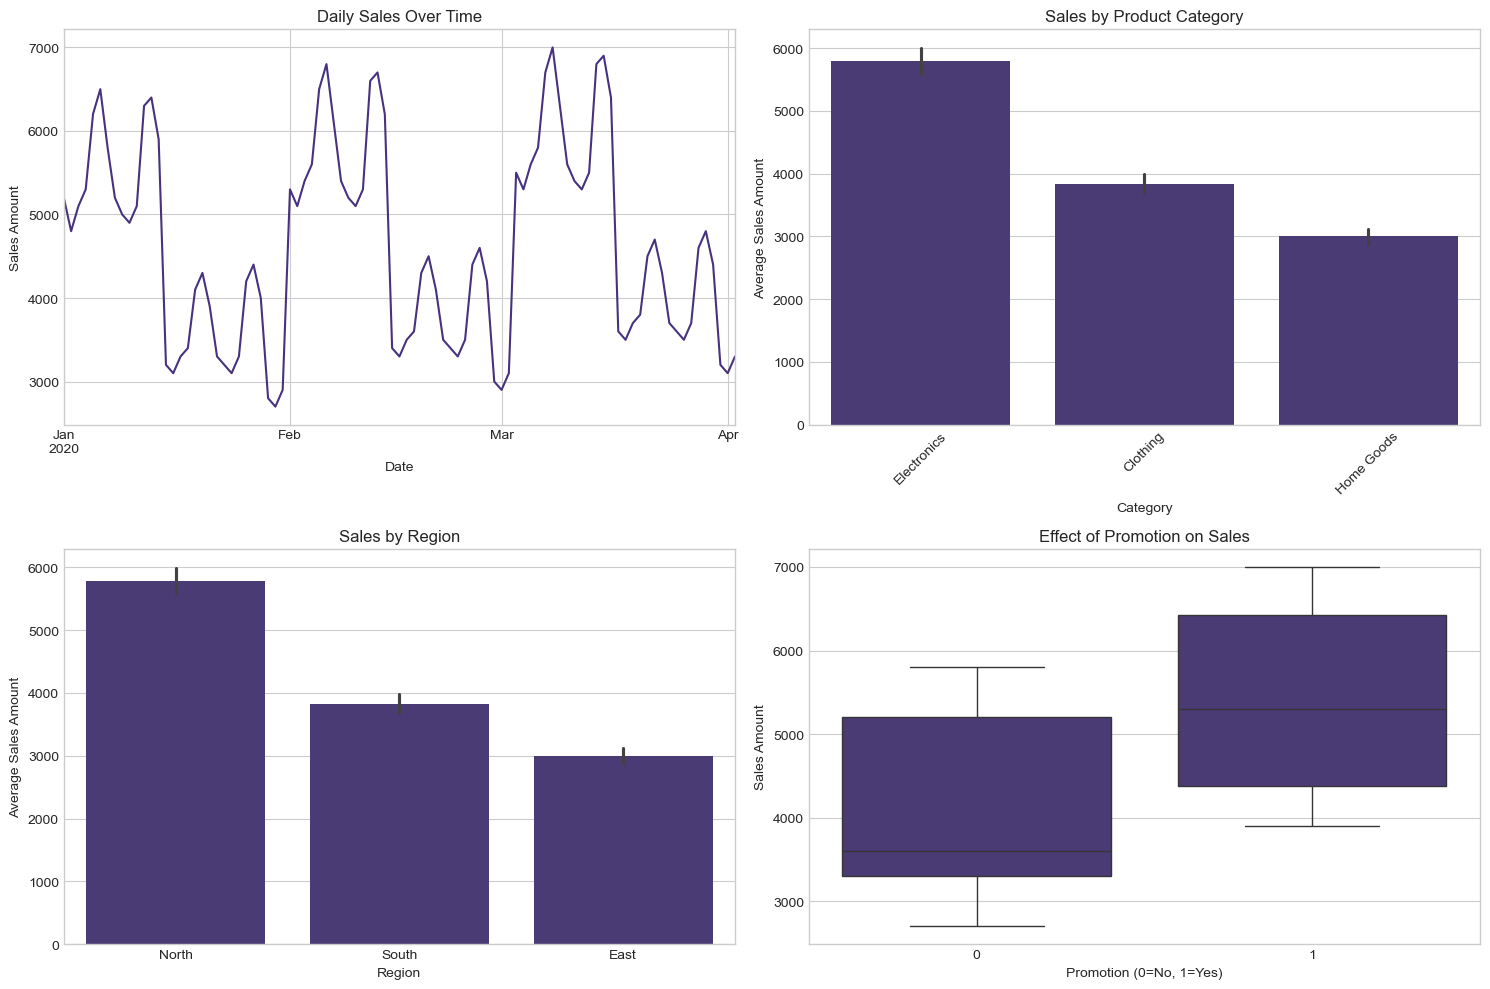

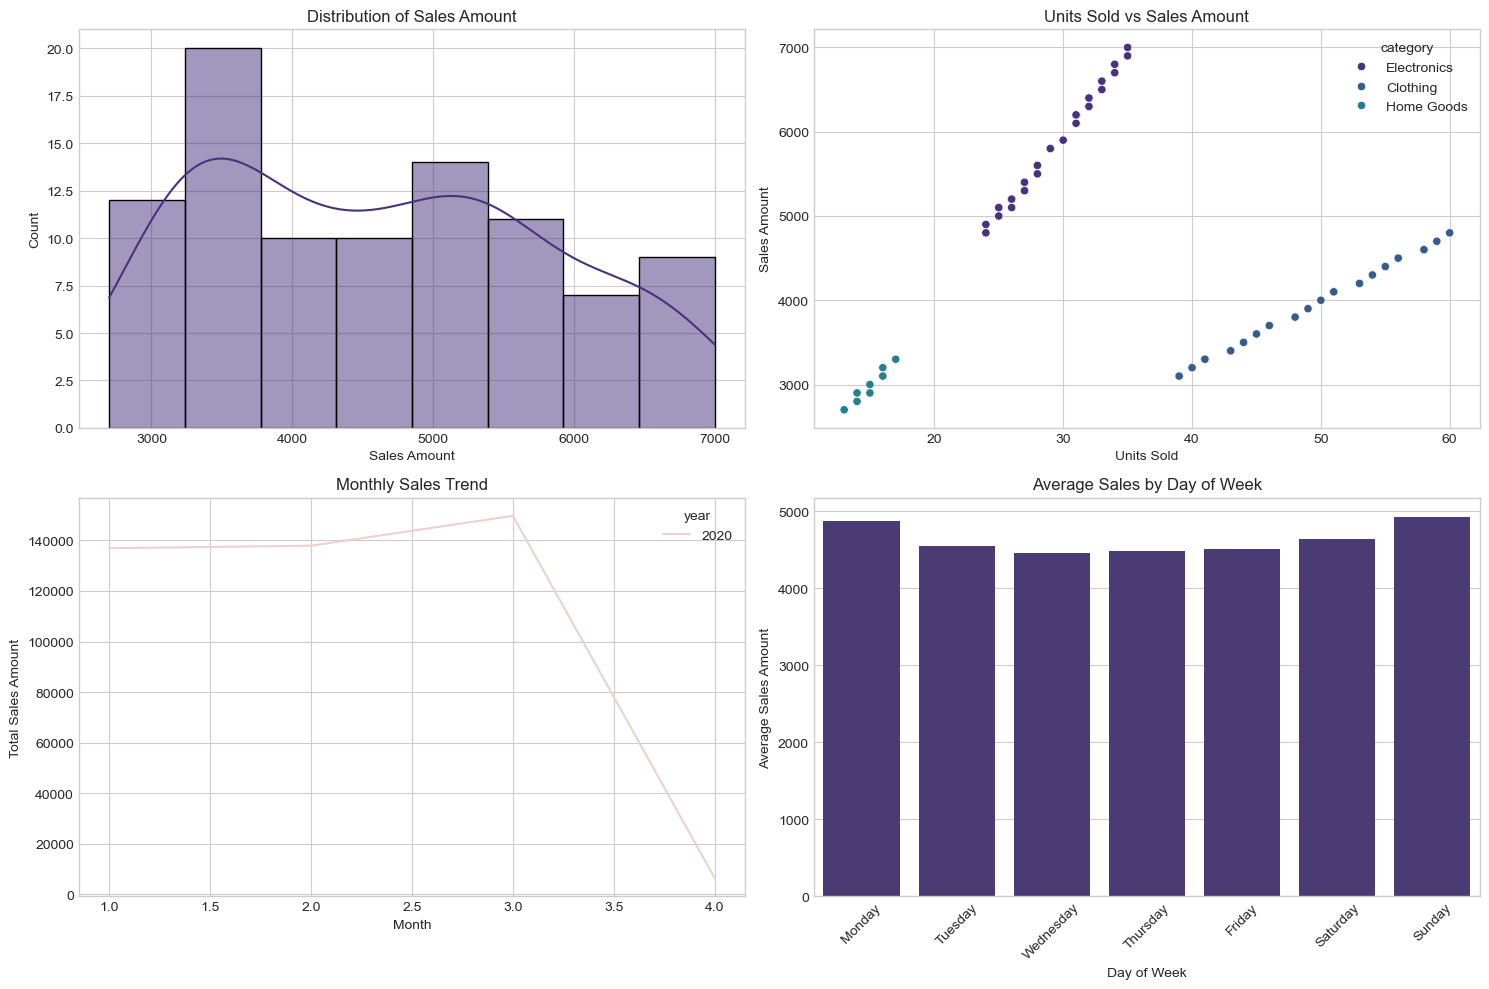

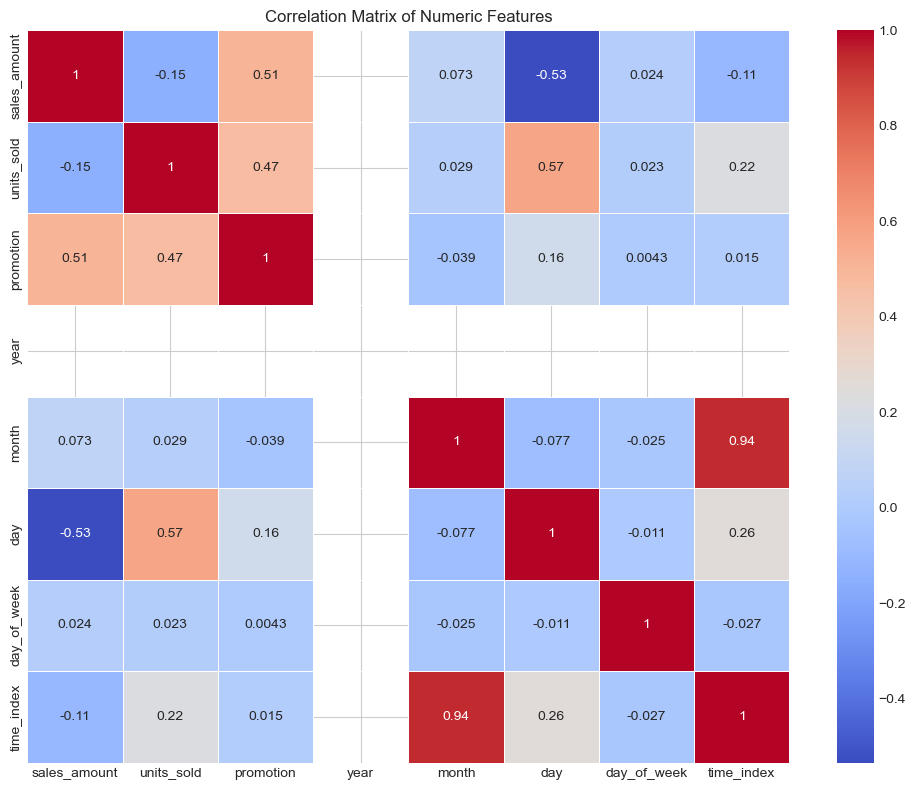

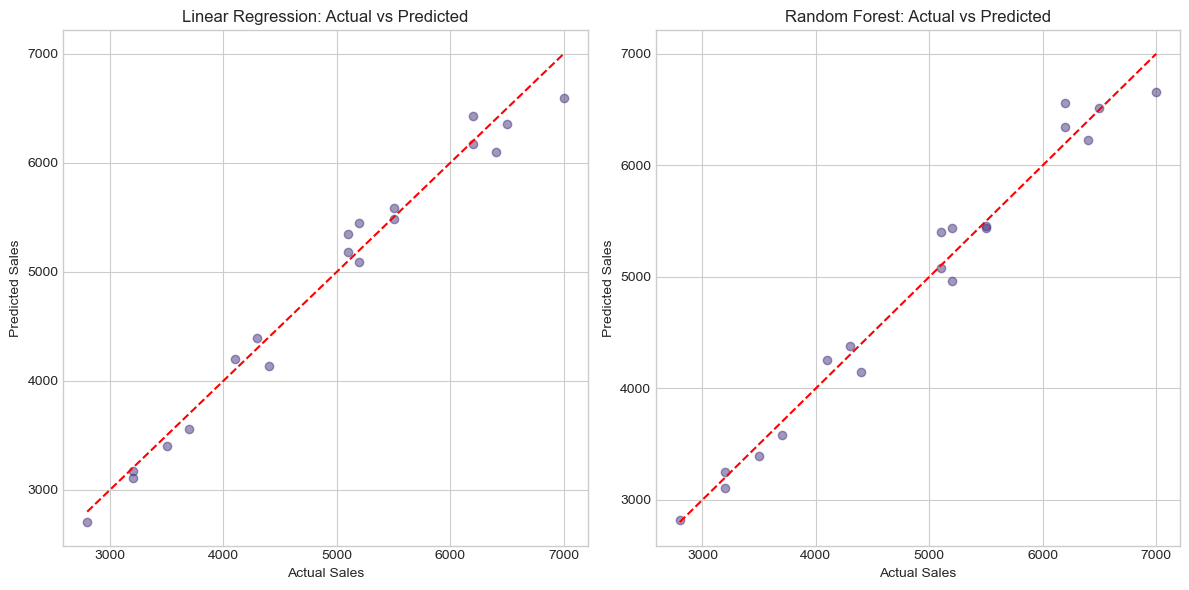

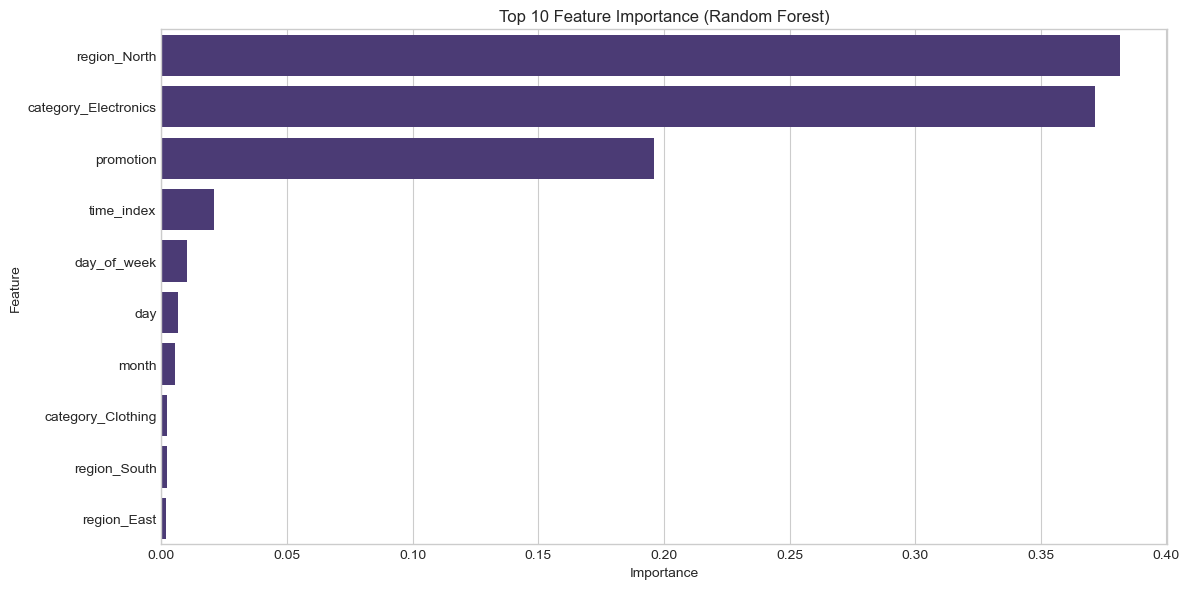

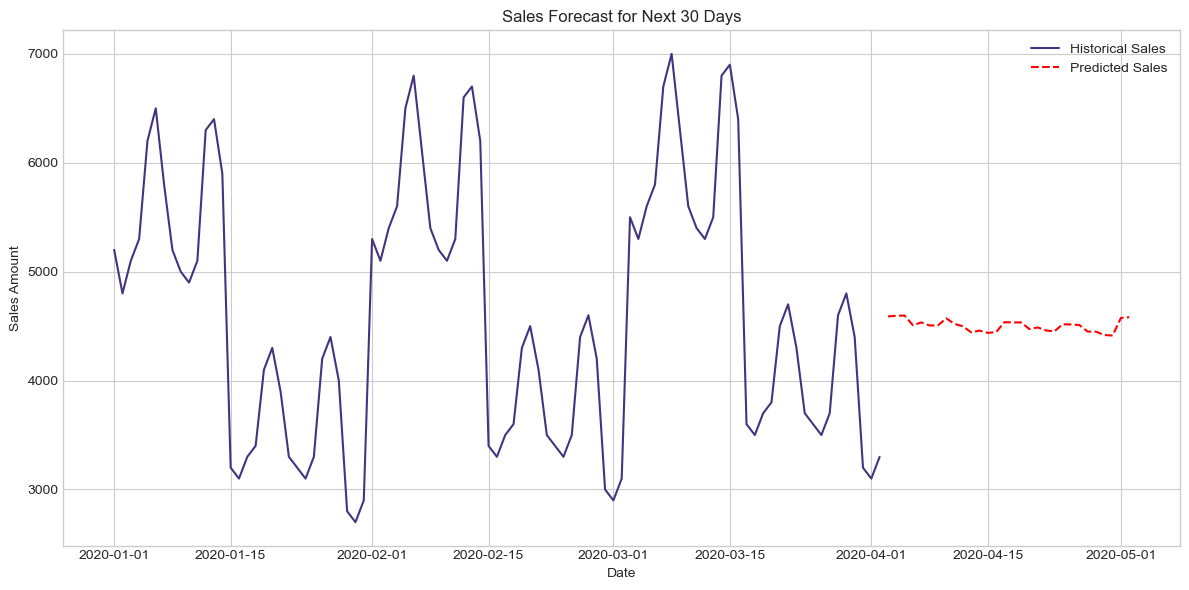

In [18]:
# Run the main function
if __name__ == "__main__":
    main()